# Google Street View API

{'BELLBIRD ROAD': [-38.1990811, 145.1044224],
 'MATHER ROAD': [-38.1959845, 145.1040959],
 'RYLSTON COURT': [-38.1940608, 145.1046181],
 'ESME COURT': [-38.192864, 145.1043193],
 'WALKERS ROAD': [-38.1894195, 145.1037342]}
 

In [1]:
import google_streetview.api

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [101]:
with open('apikey.txt') as f:
    api_key = f.readline()
    f.close


params = [{
    'size': '640x640',
    #'location': '-38.1990811,145.1044224',
    #'location': 'Corner Humpries Road & Sibyl Avenue Mount Eliza',
    #'location': '6 Millbank Drive Mount Eliza',
    'location': 'Corner HYDE STREET & FRANCIS STREET FOOTSCRAY',
    'location': 'Corner NEPEAN HIGHWAY & WOORALLA DRIVE MOUNT ELIZA',
    'fov': '90',
    'pitch': '0',
    'heading': '48',
    'key': api_key
}]

results = google_streetview.api.results(params)

results.save_metadata('downloads/millbank.json')
results.save_links('downloads/millbank.txt')
results.download_links('downloads')

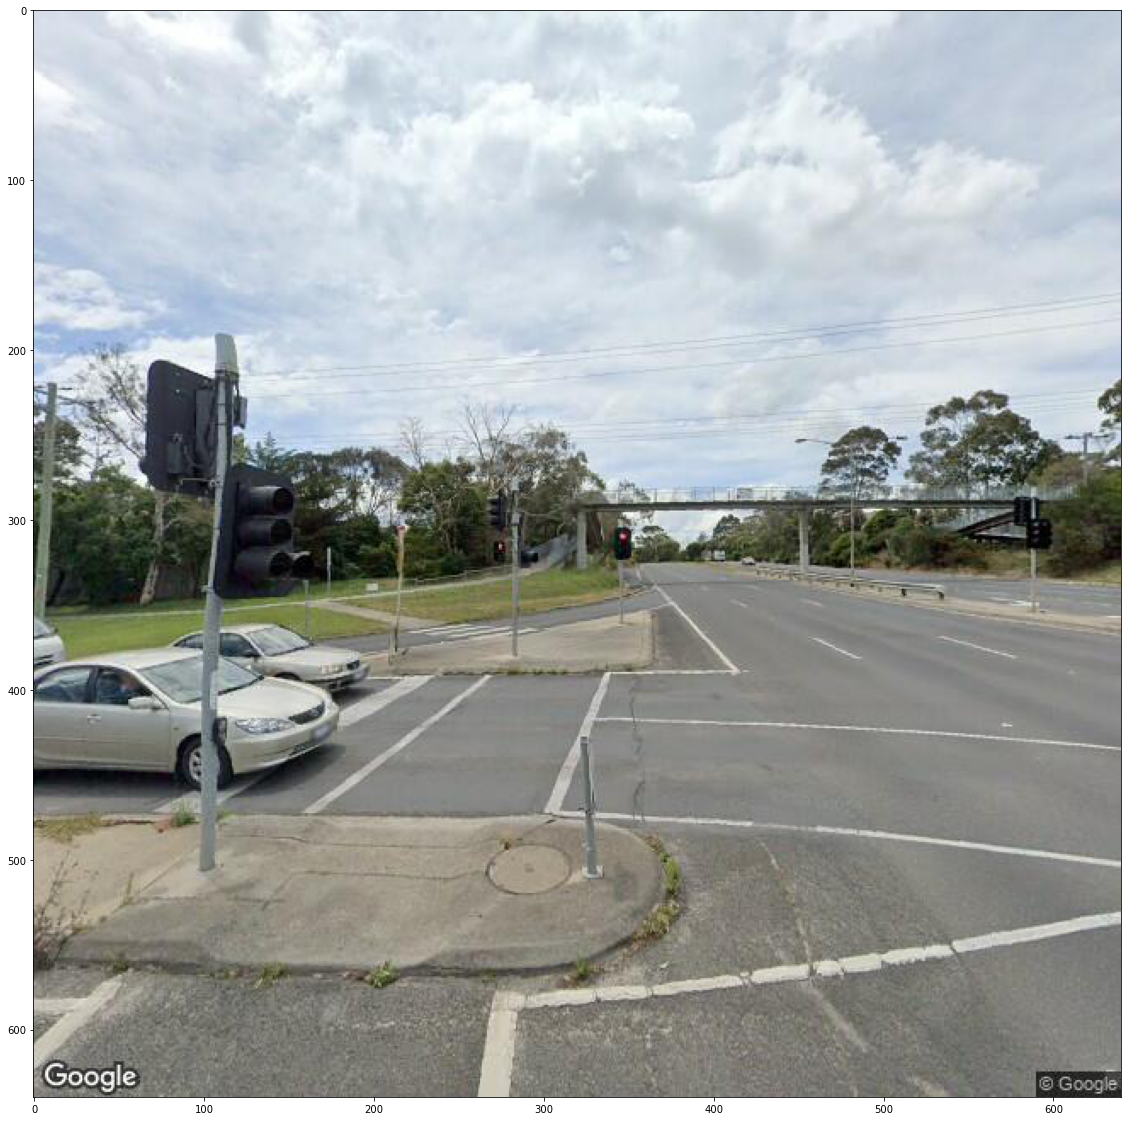

In [102]:

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
img = mpimg.imread('downloads/gsv_0.jpg')
imgplot = ax.imshow(img)
plt.show()

## Find the distance between two points

In [80]:
import geopy.distance

coords_1 = (-38.1990811, 145.1044224)
coords_2 = (-38.1959845, 145.1040959)

geopy.distance.distance(coords_1, coords_2).m

344.9110919327848

## Find the bearing from one point to the next

In [81]:
from geographiclib.geodesic import Geodesic

def get_bering(lat1, lon1, lat2, lon2):
    brng = Geodesic.WGS84.Inverse(lat1, lon1, lat2, lon2)['azi1']
    return brng

get_bering(-38.1990811, 145.1044224, -38.1959845, 145.1040959)

-4.756557939058697

## Approach

* Find distinct roads
* Find intersections

* For each intersection:
    * What is the closest point in the LineString?
    * What are the one or two adjacent points?
    * What is the bearing to each of those two points?
    * What is the next point X metres away on each bearing?
    
This will tell me which bearing to use to face down the road
And it will allow me to take a sample X metres away from the intersection